In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
df = pd.read_csv('/Untitled spreadsheet - Students_Grading_Dataset (3).csv')

In [ ]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance,Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


In [ ]:
# Check columns
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance                  5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [ ]:
# Lets check for any null values
df.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0


In [ ]:
# Let's check the data inside the columns where null values exist so that we can know how to handle missing values
print(df['Assignments_Avg'])

0       73.69
1       74.23
2       85.85
3       68.10
4       67.66
        ...  
4995    74.13
4996    57.89
4997    84.69
4998    78.78
4999    87.06
Name: Assignments_Avg, Length: 5000, dtype: float64


In [ ]:
skewness = df['Assignments_Avg'].skew()
print(f'Skewness: {skewness}')

Skewness: 0.005435870564487263


In [ ]:
# We can see that the value is close to 0 which means that there is normal distribution, so we'll use Mean to fill the null values
mean_assign_avg = df['Assignments_Avg'].mean()
df.fillna({'Assignments_Avg': mean_assign_avg}, inplace=True)

In [ ]:
print(df['Attendance (%)'])


0       97.36
1       97.71
2       99.52
3       90.38
4       59.41
        ...  
4995    96.09
4996    96.30
4997    89.94
4998    99.09
4999    90.33
Name: Attendance (%), Length: 5000, dtype: float64


In [ ]:
skewness = df['Attendance (%)'].skew()
print("Skewness: ", skewness)

Skewness:  -0.0438636343757517


In [ ]:
# We can see that the value is close to 0 which means that there is normal distribution, so we'll use Mean to fill the null values
mean_att = df['Attendance (%)'].mean()
df.fillna({'Attendance (%)':mean_att}, inplace=True)

In [ ]:
print(df['Parent_Education_Level'])

0          Master's
1       High School
2       High School
3       High School
4          Master's
           ...     
4995       Master's
4996            NaN
4997            NaN
4998            PhD
4999            PhD
Name: Parent_Education_Level, Length: 5000, dtype: object


In [ ]:
# As the data is categorical so we will use mode(value that is frequent) to handle missing values.
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].mode()[0])

In [ ]:
# Now check again for null values
df.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0


In [ ]:
# Lets see that how many categorical columns we have in the data
df.describe(include='object')

,Student_ID,First_Name,Last_Name,Email,Gender,Department,Grade,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,5000,8,6,5000,2,4,5,2,2,4,3
top,S5999,Maria,Johnson,student4999@university.com,Male,Engineering,B,Yes,Yes,Bachelor's,Low
freq,1,657,868,1,2551,1274,1014,2512,2520,2045,1687


<function matplotlib.pyplot.show(close=None, block=None)>

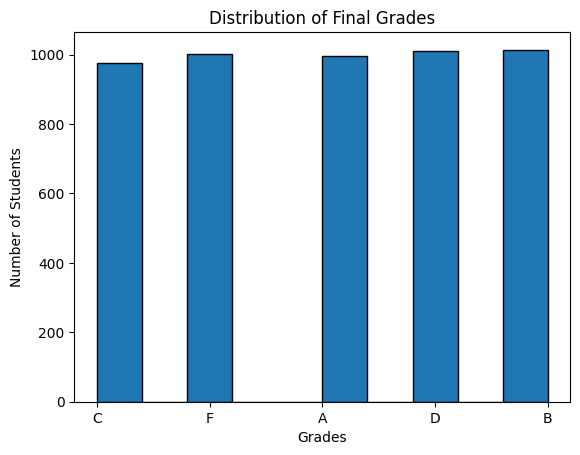

In [ ]:
# We'll analyze the Grades column to see the distribution of Grades.
import matplotlib.pyplot as plt

plt.hist(df['Grade'], bins=10, edgecolor='black')
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades')
plt.show

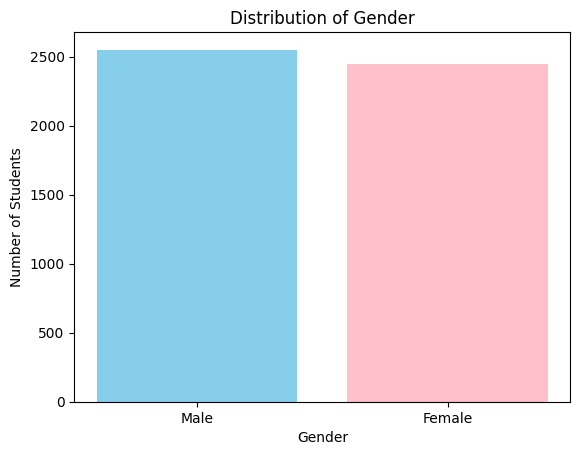

In [ ]:
# Let's analyze the distribution of Gender across the class
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Distribution of Gender')
plt.show()

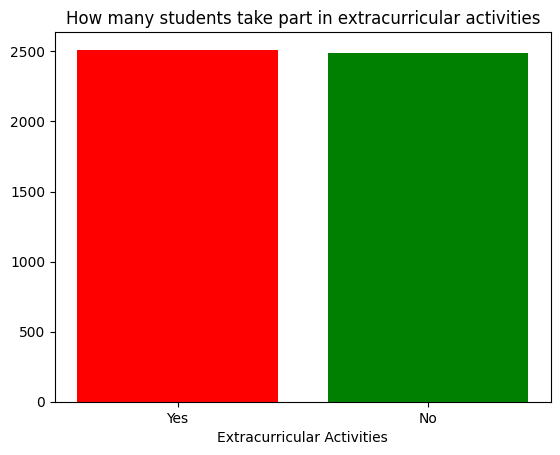

In [ ]:
act_count = df['Extracurricular_Activities'].value_counts()
plt.bar(act_count.index, act_count.values, color=['red', 'green'])
plt.xlabel('Extracurricular Activities')
plt.title('How many students take part in extracurricular activities')
plt.show()

In [ ]:
print(df.columns)


Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')


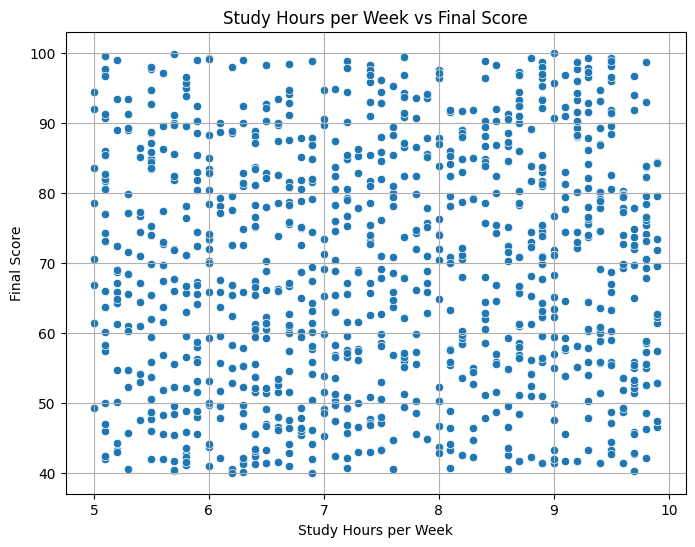

In [ ]:
# Numerical vs Numerical
# Scatter Plot: Shows the relationship between two continuous variables.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df[df['Study_Hours_per_Week'] < 10 ]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Study_Hours_per_Week', y='Final_Score')  # Use column names directly

plt.title('Study Hours per Week vs Final Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Score')
plt.grid(True)
plt.show()


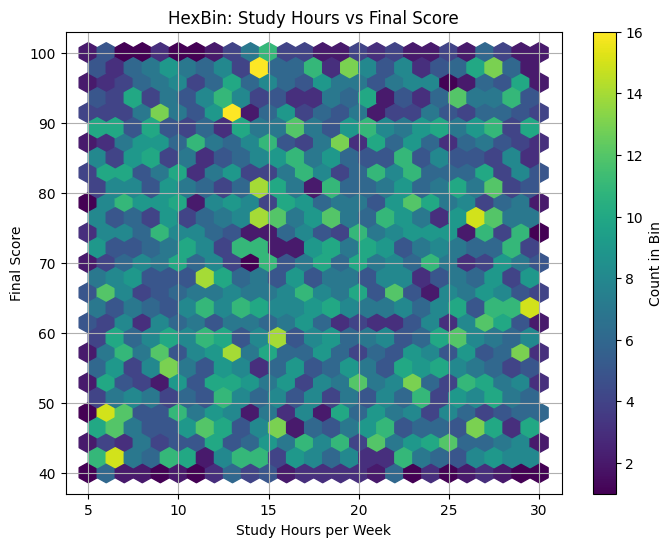

In [ ]:
plt.figure(figsize=(8,6))
plt.hexbin(df['Study_Hours_per_Week'], df['Final_Score'], gridsize=25, cmap='viridis')
plt.colorbar(label='Count in Bin')

plt.title('HexBin: Study Hours vs Final Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Score')
plt.grid(True)
plt.show()

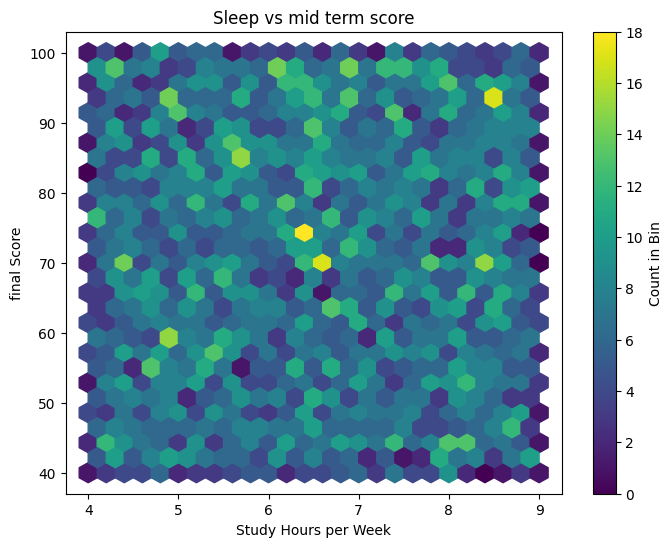

In [ ]:
plt.figure(figsize=(8,6))
plt.hexbin(df['Sleep_Hours_per_Night'], df['Midterm_Score'], gridsize=25, cmap='viridis')
plt.colorbar(label='Count in Bin')
plt.title('Sleep vs mid term score')
plt.xlabel('Study Hours per Week')
plt.ylabel('final Score')
plt.show()

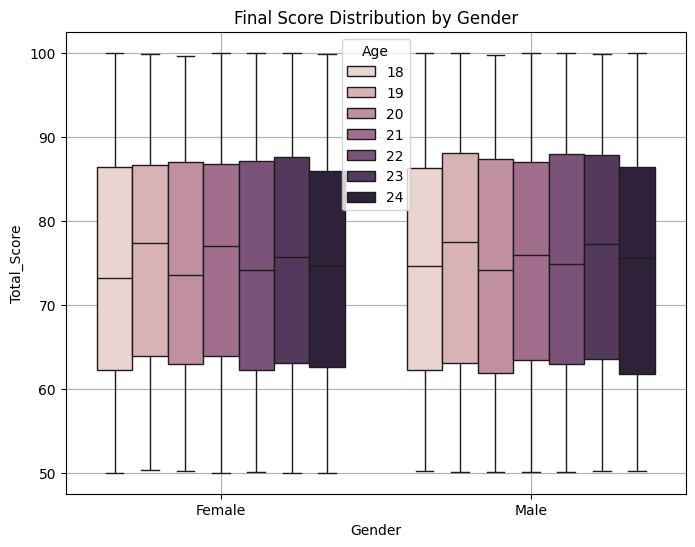

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Total_Score', hue='Age')

plt.title('Final Score Distribution by Gender')
# plt.xlabel('All Gender')
# plt.ylabel('Final Score')
plt.grid(True)
plt.show()


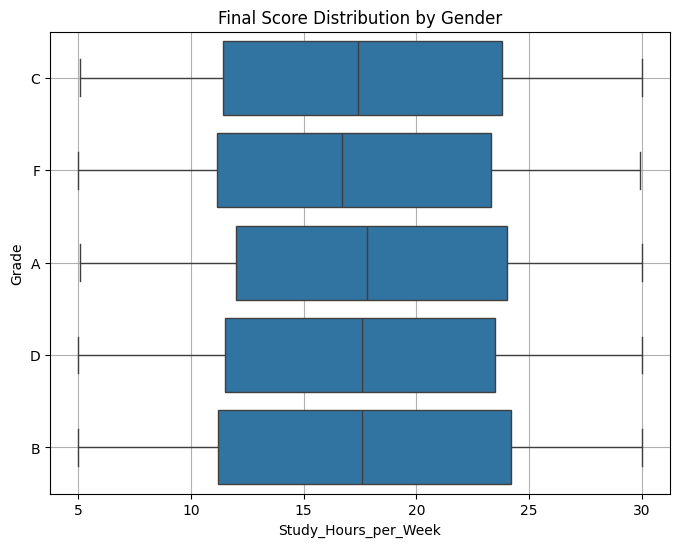

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Study_Hours_per_Week', y='Grade')

plt.title('Final Score Distribution by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Final Score')
plt.grid(True)
plt.show()


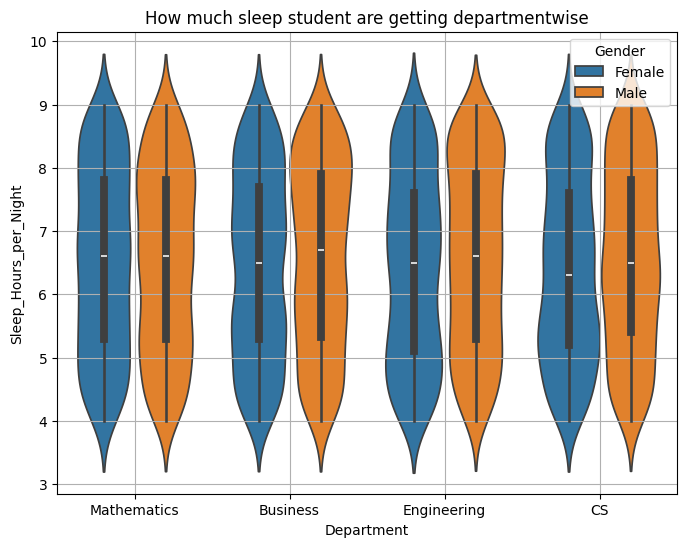

In [ ]:
# Violin Plot
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Department', y='Sleep_Hours_per_Night', hue='Gender')
plt.title('How much sleep student are getting departmentwise')
plt.grid(True)
plt.show()

<Axes: xlabel='Department', ylabel='Total_Score'>

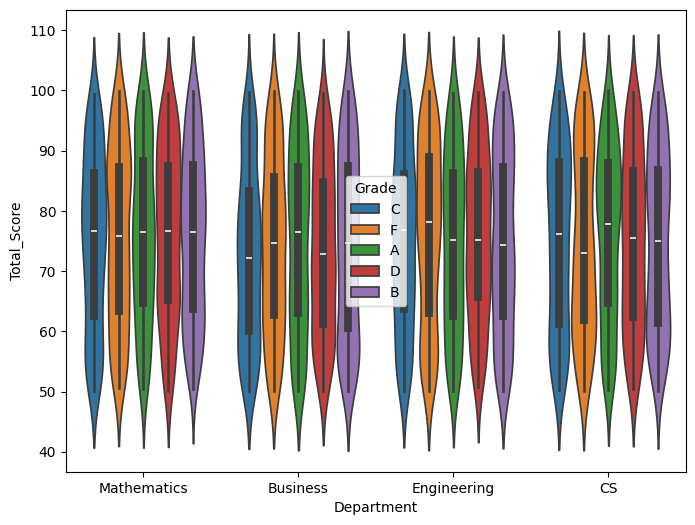

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Department', y='Total_Score', hue='Grade')

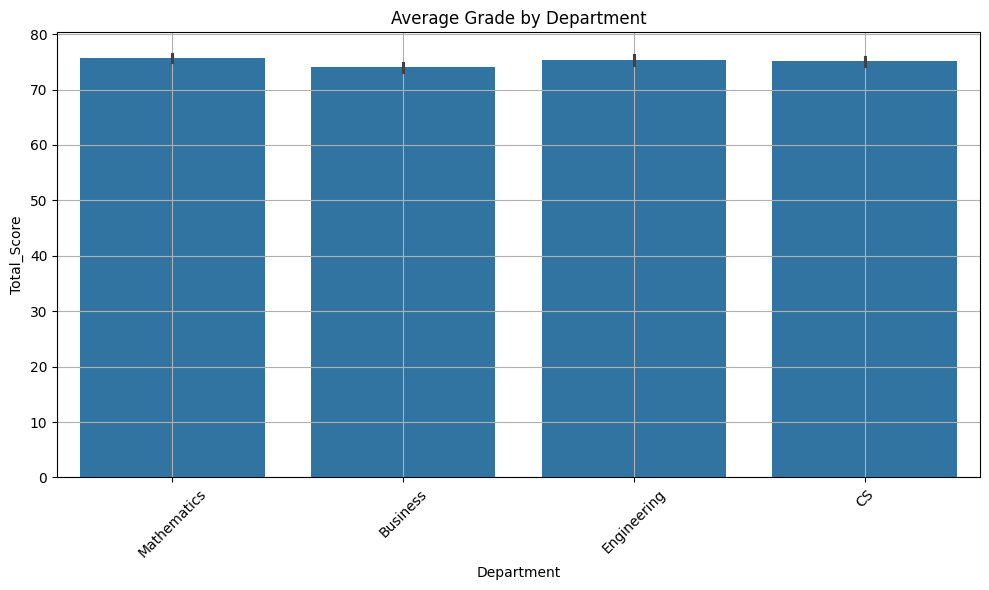

In [ ]:
# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Department', y='Total_Score', estimator='mean')
plt.title('Average Grade by Department')
plt.xticks(rotation=45) #Rotate x labels if they overlap
plt.grid(True)
plt.tight_layout()
plt.show()

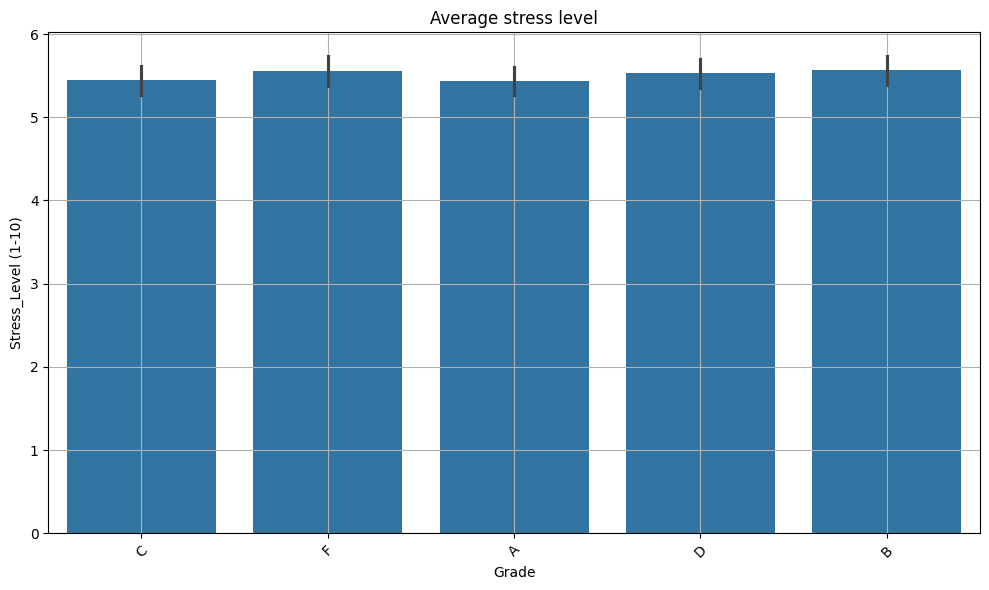

Text(0.5, 1.0, 'Number of Grades')

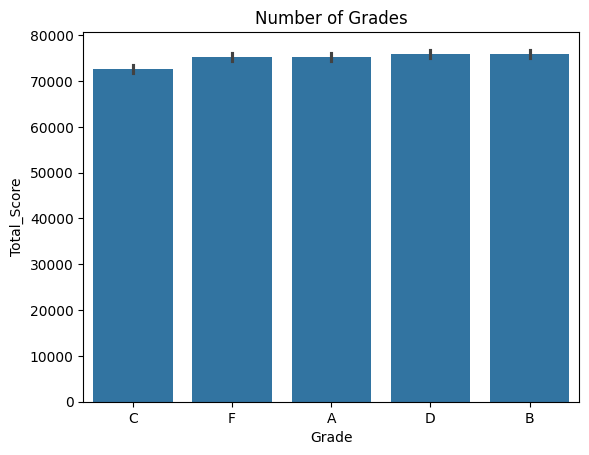

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Grade', y='Stress_Level (1-10)', estimator='mean')
plt.title('Average stress level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


sns.barplot(data=df, x='Grade', y='Total_Score', estimator=sum)
plt.title('Number of Grades')


In [ ]:
# Stacked bar chart
gender = df['Gender']
dept = df['Department']

In [ ]:
print(gender)
print(dept)

0       Female
1         Male
2         Male
3       Female
4       Female
         ...  
4995      Male
4996      Male
4997    Female
4998      Male
4999    Female
Name: Gender, Length: 5000, dtype: object
0       Mathematics
1          Business
2       Engineering
3       Engineering
4                CS
           ...     
4995             CS
4996    Mathematics
4997             CS
4998    Engineering
4999    Mathematics
Name: Department, Length: 5000, dtype: object


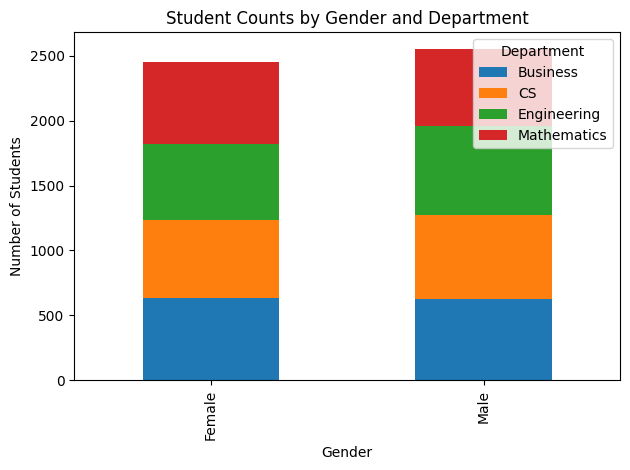

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

counts = df.groupby(['Gender', 'Department']).size().unstack()

# Plot as stacked bar chart
counts.plot(kind='bar', stacked=True)

plt.title('Student Counts by Gender and Department')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.legend(title='Department')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns like IDs
df_clean = df.drop(['Student_ID'], axis=1)  # replace with actual ID column name

# Encode categorical columns
categorical_cols = df_clean.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Grade')  # we’ll encode the target separately if needed

# Apply label encoding or one-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols)

# Separate features and target
X = df_encoded.drop('Grade', axis=1)
y = df_encoded['Grade']

# Encode the target if it's categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train-test split with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y,  random_state=0
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Grade distribution (encoded):
 0     997
1    1014
2     975
3    1011
4    1003
Name: count, dtype: int64


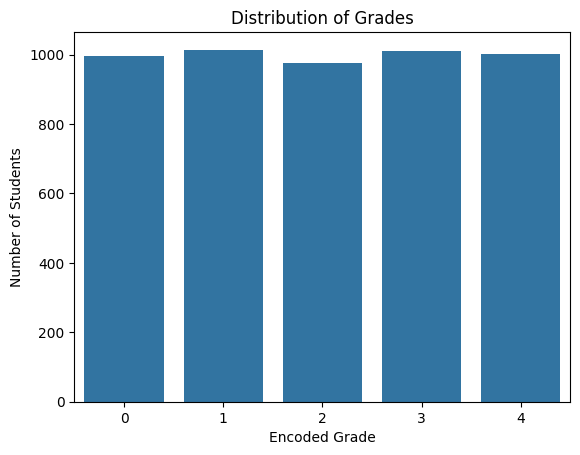

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Count the occurrences of each grade
grade_counts = pd.Series(y).value_counts().sort_index()
print("Grade distribution (encoded):\n", grade_counts)

# Step 2: Plot it
sns.countplot(x=y)
plt.title("Distribution of Grades")
plt.xlabel("Encoded Grade")
plt.ylabel("Number of Students")
plt.show()


Logistic Regression Accuracy: 0.203
              precision    recall  f1-score   support

           A       0.19      0.19      0.19       199
           B       0.21      0.27      0.23       203
           C       0.15      0.08      0.11       195
           D       0.23      0.23      0.23       202
           F       0.21      0.24      0.22       201

    accuracy                           0.20      1000
   macro avg       0.20      0.20      0.20      1000
weighted avg       0.20      0.20      0.20      1000



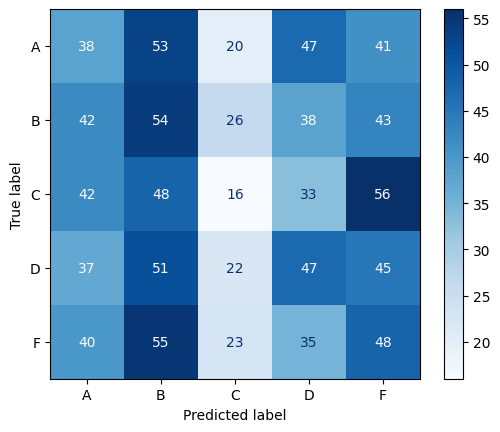

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr), 4))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

# Optional Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test, display_labels=le.classes_, cmap='Blues')


#Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load the dataset
df = pd.read_csv('/Untitled spreadsheet - Students_Grading_Dataset (3).csv')

# Step 2: Drop irrelevant columns
df = df.drop(columns=[
    'Student_ID', 'First_Name', 'Last_Name', 'Email', 'Total_Score'
])

# Step 3: Handle missing values (basic strategy: fill numeric with median, categorical with mode)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Step 4: Label encode categorical features
categorical_cols = [
    'Gender', 'Department', 'Extracurricular_Activities',
    'Internet_Access_at_Home', 'Parent_Education_Level',
    'Family_Income_Level'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 5: Separate features and target
X = df.drop(columns=['Grade'])
y = df['Grade']

# Encode target if it's categorical (assumed here)
y = le.fit_transform(y)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Your data is ready for model training
print("✅ Data cleaned and preprocessed. Ready for training!")


✅ Data cleaned and preprocessed. Ready for training!


<ipython-input-46-fbd9de8e3850>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-46-fbd9de8e3850>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

#Model 1: SVM

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

In [ ]:
# Convert 'Grade' into binary classification: Pass = 1 (A/B/C), Fail = 0 (D/F)
df['Grade_Binary'] = df['Grade'].apply(lambda x: 1 if x in ['A', 'B', 'C'] else 0)

# Select features
features = ['Gender', 'Department', 'Extracurricular_Activities',
    'Internet_Access_at_Home', 'Parent_Education_Level',
    'Family_Income_Level']

X = df[features]
y = df['Grade_Binary']

In [ ]:
# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train the SVM model
svm_model = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 60.5 %


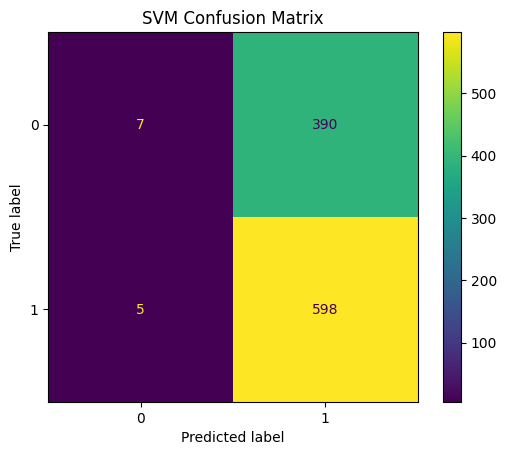

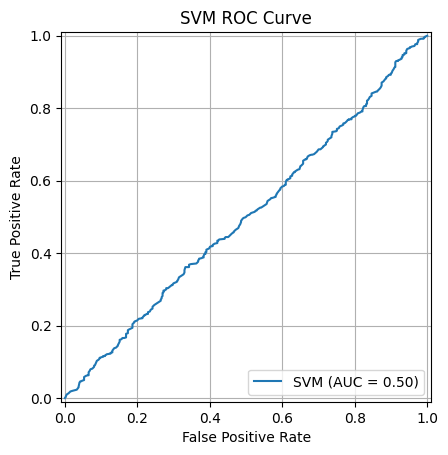

ROC AUC Score: 0.4995


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM').plot()
plt.title("SVM ROC Curve")
plt.grid()
plt.show()

# AUC Score
print("ROC AUC Score:", round(roc_auc, 4))

#Model 2: Logistic Regression

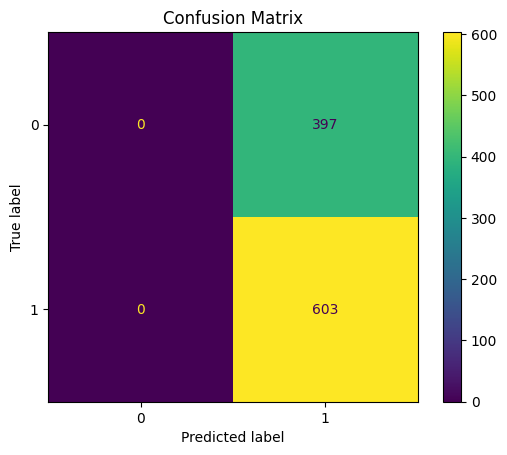

<Figure size 640x480 with 0 Axes>

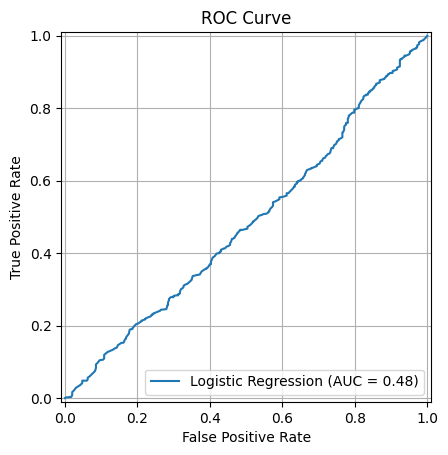

Accuracy: 60.3 %
AUC Score: 0.4813
AUC Score: 0.48129837796742575


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay


# Select features
features = ['Gender', 'Department', 'Extracurricular_Activities',
    'Internet_Access_at_Home', 'Parent_Education_Level',
    'Family_Income_Level']

X = df[features]
y = df['Grade_Binary']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot()
plt.title('ROC Curve')
plt.grid()
plt.show()

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")
print("AUC Score:", round(roc_auc, 4))


print("AUC Score:", roc_auc)


#Model 3: Random Forest

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 60.4 %


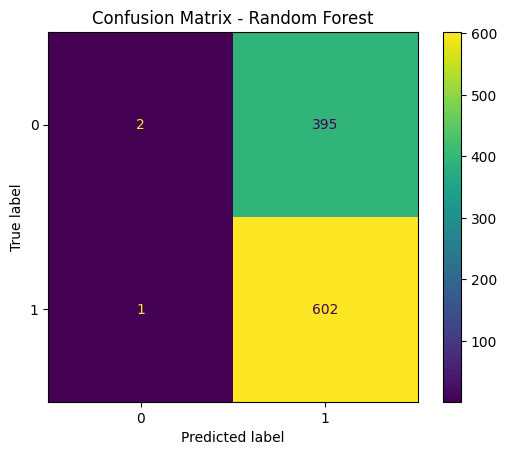

<Figure size 640x480 with 0 Axes>

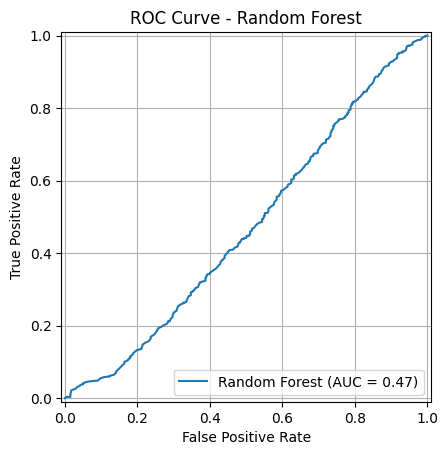

AUC Score: 0.4711


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc, RocCurveDisplay

# Select features
features = ['Gender', 'Department', 'Extracurricular_Activities',
    'Internet_Access_at_Home', 'Parent_Education_Level',
    'Family_Income_Level']

X = df[features]
y = df['Grade_Binary']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and train the Random Forest model using GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions using the best model
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest').plot()
plt.title('ROC Curve - Random Forest')
plt.grid()
plt.show()

print("AUC Score:", round(roc_auc, 4))

#Model 4: Decision Tree

Decision Tree Accuracy: 54.0 %


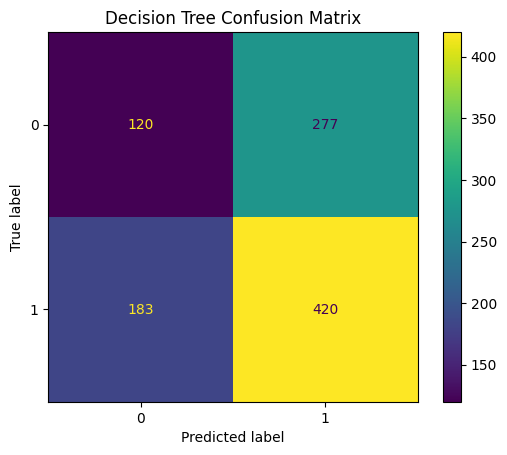

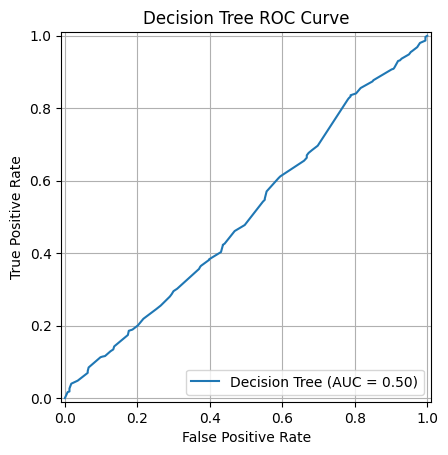

Decision Tree ROC AUC Score: 0.5044


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", round(dt_accuracy * 100, 2), "%")

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

# ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
RocCurveDisplay(fpr=fpr_dt, tpr=tpr_dt, roc_auc=roc_auc_dt, estimator_name='Decision Tree').plot()
plt.title("Decision Tree ROC Curve")
plt.grid()
plt.show()

# AUC Score
print("Decision Tree ROC AUC Score:", round(roc_auc_dt, 4))


#Model 5: Neural Networks (MLP)

MLP Neural Network Accuracy: 60.1 %


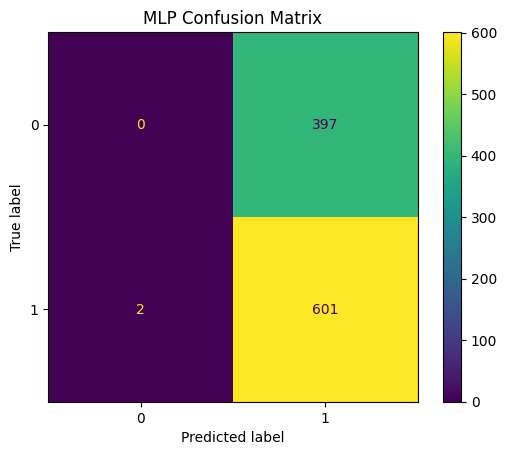

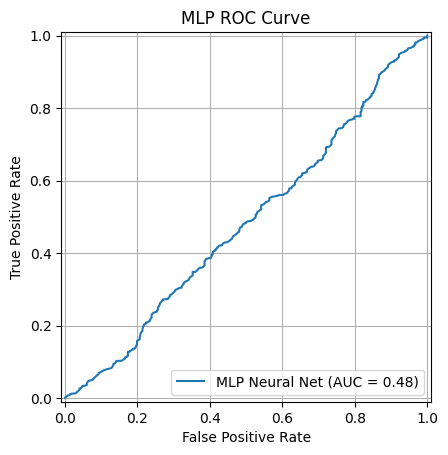

MLP ROC AUC Score: 0.4822


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize and train the MLP model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # Two hidden layers
    activation='relu',
    solver='adam',
    alpha=0.0005,  # L2 regularization
    max_iter=500,
    random_state=42,
    early_stopping=True
)

mlp_model.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Accuracy
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Neural Network Accuracy:", round(mlp_accuracy * 100, 2), "%")

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot()
plt.title("MLP Confusion Matrix")
plt.show()

# ROC Curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
RocCurveDisplay(fpr=fpr_mlp, tpr=tpr_mlp, roc_auc=roc_auc_mlp, estimator_name='MLP Neural Net').plot()
plt.title("MLP ROC Curve")
plt.grid()
plt.show()

# AUC Score
print("MLP ROC AUC Score:", round(roc_auc_mlp, 4))


#Model 6: KNN

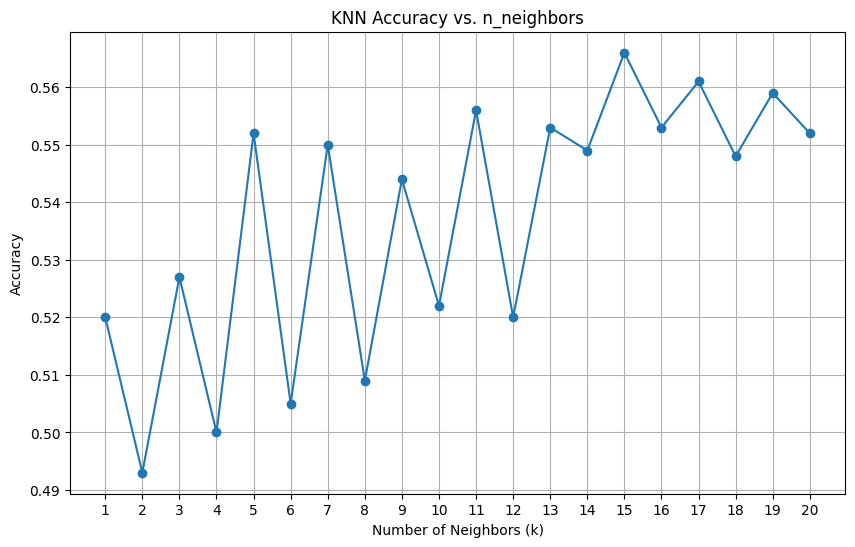

🔢 Best n_neighbors: 15
✅ Highest Accuracy: 56.6%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbors_range = range(1, 21)
accuracies = []

for k in neighbors_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting accuracy vs n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, accuracies, marker='o')
plt.title('KNN Accuracy vs. n_neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(neighbors_range)
plt.show()

# Print best k
best_k = neighbors_range[accuracies.index(max(accuracies))]
print(f"🔢 Best n_neighbors: {best_k}")
print(f"✅ Highest Accuracy: {round(max(accuracies) * 100, 2)}%")


#Model 7:XGBoost Classifier

XGBoost Accuracy: 58.9 %


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:24:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


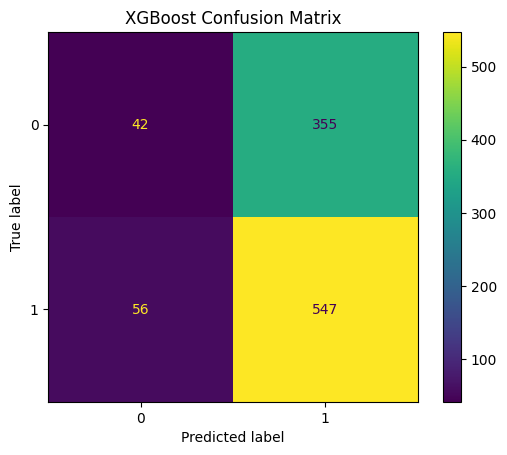

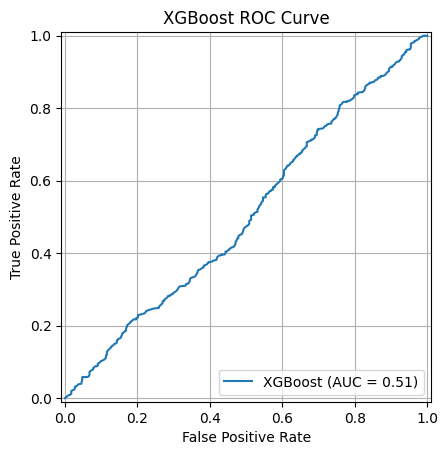

XGBoost ROC AUC Score: 0.5059


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", round(xgb_accuracy * 100, 2), "%")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()
plt.title("XGBoost Confusion Matrix")
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb, roc_auc=roc_auc_xgb, estimator_name='XGBoost').plot()
plt.title("XGBoost ROC Curve")
plt.grid()
plt.show()

# AUC Score
print("XGBoost ROC AUC Score:", round(roc_auc_xgb, 4))
